In [23]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
Consumer_Key = "wPqzRAD6SEdriV4dfLGmqehX5"
Consumer_Secret_Key = "Nz0lxeKJMiSLje2oMW02xlh4oFane1luGej3ntoQNZ1dEO2m3P" 
Access_Token = "1588141653402955777-QitXYq05orKkIo5STao4Ee741EaQeO"
Access_Token_Secret = "PmvFp3gInb5KF7tLBeqDIg2kLSUr1LiXuvKCf5eR8W8UG"

In [25]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [26]:
posts = api.user_timeline(screen_name="smartfrenworld", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) Asik ada promo akhir tahun di Akulaku nih guys! 😍 Diskon Paket Data hingga 5rb! Yuk buruan beli sekarang disini 😉 👉 https://t.co/YFxC6QcIRP https://t.co/L3JE84qhrt

2) Promo Gajian guys!! 🤩

Cukup tukar 50 SmartPoin kamu di aplikasi mySF sekarang dan dapatkan bonus cashback belanja 55 ribu! ✨

Yuk, tukar sekarang 👉 https://t.co/emW1pK039c https://t.co/ux3ekWDkD4

3) Belanja Lebih Hemat Pakai Astro 🤩

Tukarkan 10 SmartPoin kamu di aplikasi mySF dan dapatkan voucher diskon belanja hingga 50rb! ✨

Yuk, tukar sekarang! 👉 https://t.co/fI5xHqvbXx https://t.co/JLblKCH9F3

4) Beli Kuota Bisa Dapat Cashback GoPay ⁉️ 🤩

Buat kamu pengguna baru bisa nikmati cashback hingga 7 ribu, lho! Untung banget kan? Bayar pakai GoPay ya~ 

Buruan transaksi sekarang 👉 https://t.co/BIVmg3qEeU https://t.co/1GjZOWxqtB

5) Dapatkan berbagai Games Seru di Google Play😍 Beli games nya pake smartfren biar lebih praktis! Yuk beli disini Yuk cek disini 👉 https://t.co/dkFrYpFKns https://t.co/TGhSG

In [27]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Asik ada promo akhir tahun di Akulaku nih guys...
1,Promo Gajian guys!! 🤩\n\nCukup tukar 50 SmartP...
2,Belanja Lebih Hemat Pakai Astro 🤩\n\nTukarkan ...
3,Beli Kuota Bisa Dapat Cashback GoPay ⁉️ 🤩\n\nB...
4,Dapatkan berbagai Games Seru di Google Play😍 B...


In [28]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Asik ada promo akhir tahun di Akulaku nih guys...
1,Promo Gajian guys!! 🤩\n\nCukup tukar 50 SmartP...
2,Belanja Lebih Hemat Pakai Astro 🤩\n\nTukarkan ...
3,Beli Kuota Bisa Dapat Cashback GoPay ⁉️ 🤩\n\nB...
4,Dapatkan berbagai Games Seru di Google Play😍 B...
...,...
195,Makan enak perut kenyang di Daun Curry dengan ...
196,Promo cashback hadir!\n\nDapatkan Cashback 30%...
197,Beli paket internet bisa pakai SmartPoin? 😱\n\...
198,"Udah mau weekend ajahh, jajan yuk! 🤩\n\nJajan ..."


In [29]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Asik ada promo akhir tahun di Akulaku nih guys...,0.0,0.0
1,Promo Gajian guys!! 🤩\n\nCukup tukar 50 SmartP...,0.0,0.0
2,Belanja Lebih Hemat Pakai Astro 🤩\n\nTukarkan ...,0.0,0.0
3,Beli Kuota Bisa Dapat Cashback GoPay ⁉️ 🤩\n\nB...,0.0,0.0
4,Dapatkan berbagai Games Seru di Google Play😍 B...,0.0,0.0
...,...,...,...
195,Makan enak perut kenyang di Daun Curry dengan ...,0.0,0.0
196,Promo cashback hadir!\n\nDapatkan Cashback 30%...,0.0,0.0
197,Beli paket internet bisa pakai SmartPoin? 😱\n\...,0.0,0.0
198,"Udah mau weekend ajahh, jajan yuk! 🤩\n\nJajan ...",0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

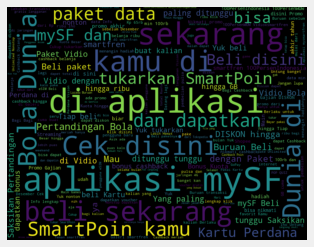

In [30]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=900, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [31]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Asik ada promo akhir tahun di Akulaku nih guys...,0.0,0.0,Neutral
1,Promo Gajian guys!! 🤩\n\nCukup tukar 50 SmartP...,0.0,0.0,Neutral
2,Belanja Lebih Hemat Pakai Astro 🤩\n\nTukarkan ...,0.0,0.0,Neutral
3,Beli Kuota Bisa Dapat Cashback GoPay ⁉️ 🤩\n\nB...,0.0,0.0,Neutral
4,Dapatkan berbagai Games Seru di Google Play😍 B...,0.0,0.0,Neutral
...,...,...,...,...
195,Makan enak perut kenyang di Daun Curry dengan ...,0.0,0.0,Neutral
196,Promo cashback hadir!\n\nDapatkan Cashback 30%...,0.0,0.0,Neutral
197,Beli paket internet bisa pakai SmartPoin? 😱\n\...,0.0,0.0,Neutral
198,"Udah mau weekend ajahh, jajan yuk! 🤩\n\nJajan ...",0.0,0.0,Neutral


In [32]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6) Main Games makin seru dengan paket Game Booster! Nikmati fitur untuk pengalaman main games terbaik 😍
 

7) Hi, Teman smartfren! 

Guna meningkatkan layanan konsumen, kami melakukan pembaruan sistem berkelanjutan pada 14 Des 2022 jam 20.00 WIB - 15 Des jam 06.00 WIB. Aktivitas, pembelian, &amp; layanan call center akan terdampak. Layanan pelanggan dapat hubungi WhatsApp 08881212888 

8) Main Games makin seru dengan paket Game Booster! Nikmati fitur untuk pengalaman main games terbaik 😍
 



In [33]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) Promo spesial buat kalian Para Gamers! 🤩😮

Yuk! Top up Google Play pake smartfren dan dapatin diskonya, cek disini 👉  

200) Hadiah dari POP QUIZ‼️

Main Pop Quiz di aplikasi mySF, bisa menangin hadiah juta-an rupiah!💰😍

Ayo mainkan di sini 👉  

201) Mau menangin hadiah di smartfren WOW?😍

Buruan, lakukan transaksi apapun sebanyak-banyaknya dan dapetin kesempatan buat menangin hadiahnya lewat Lucky Draw! 

Cek infonya di 👉  

202) Mau menangin hadiah di smartfren WOW?😍

Buruan, lakukan transaksi apapun sebanyak-banyaknya dan dapetin kesempatan buat menangin hadiahnya lewat Lucky Draw! 

Cek infonya di 👉  

203) Main mobile legend pake skin Neymar Jr. Beli diamond di Codashop, bisa bayar pake smartfren. Yuk beli disini! 🤩👉  

204) Main mobile legend pake skin Neymar Jr. Beli diamond di Codashop, bisa bayar pake smartfren. Yuk beli disini! 🤩👉  

205) Ternyata jadi bapak-bapak juga harus multitasking ya :p
Biar lebih asyik nonton pertandingan bola, jangan l

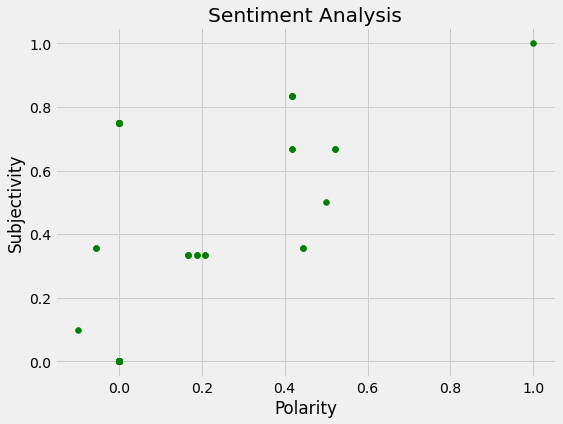

In [34]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [35]:
df['Analysis'].value_counts()

Neutral     178
Positive     19
Negative      3
Name: Analysis, dtype: int64

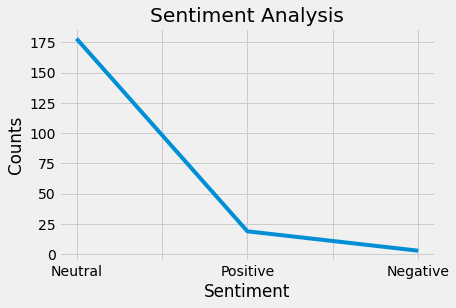

In [36]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [37]:
df['Analysis'].value_counts()

Neutral     178
Positive     19
Negative      3
Name: Analysis, dtype: int64

In [38]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.083028,0.035056
std,0.220299,0.127601
min,0.000000,-0.100000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [39]:
df.duplicated().sum()

84

In [40]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [41]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [42]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.00000,0.71575
Polarity,0.71575,1.00000


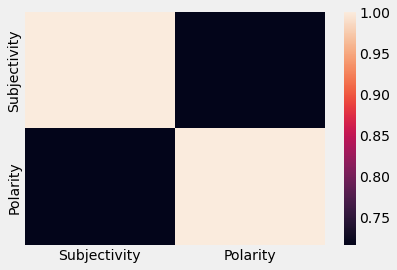

In [43]:
sns.heatmap(df.corr())